## Цель проекта 
Представьте что вы работаете Аналитиком Данных в риелторской конторе, по продаже недвижимости заграницей. Один из ваших ходовых сервисов, это полный анализ рынка и спектр предложений по выгодной покупке.
Ваша фирма работает по секторам - странам, и ваша задача это сформулировать предложение для группы покупателей, нацеленных купить недвижимость в России.
Большинство людей нацелены на покупку недвижимости в Санкт Петербурге, так что ваша задача сравнить данные города в добавок к остальным городам.

## Описание Данных 
Каждая запись - это объявление о продаже недвижимости 

- total_images — общее количество изображений, представленных для объекта недвижимости; 
- last_price — последняя цена недвижимости;
- total_area — общая площадь недвижимости в квадратных метрах;
- first_day_exposition — дата первого дня выставления объекта недвижимости на продажу;
- rooms — количество комнат в недвижимости;
- ceiling_height — высота потолка; 
- floors_total  — общее количество этажей в здании, в котором находится недвижимость;
- living_area — жилая площадь;
- floor — этаж, на котором находится объект;
- is_apartment — является ли объект квартирой;
- studio — студия или нет; 
- open_plan — открытая планировка или нет;
- kitchen_area — площадь кухни;
- balcony — количество балконов; 
- locality_name — название населенного пункта, где находится объект;
- aiports_nearest — расстояние до ближайшего аэропорта в метрах;
- cityCenters_nearest — расстояние до центра города в метрах;
- parks_around3000 — количество парков в радиусе 3000 метров;
- parks_nearest — расстояние до ближайшего парка;
- ponds_around3000 — количество водоемов в радиусе 3000 метров;
- ponds_nearest — расстояние до ближайшего водоема;
- days_exposition — количество дней, в течение которых объект был выставлен на продажу.

## Импортируйте нужные библиотеки¶

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import datetime
import plotly.graph_objects as go

## Задачи

### Для начала предобработайте данные! И проанализируйте их! (Посмотрите средние, медианы, кол-во объявлений итд.) **Просмотрите внимательно средние значения по городам!** (Очистите данные от областей (locality_name), в которых менее 50 объявлений)

#### Загружаем данные

In [2]:
df = pd.read_csv('real_estate_data_.csv', sep = '\t')
df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


#### Проверка на дупликаты

In [3]:
df[df.duplicated()] #No Duplicates

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Мы видим, что с дубликатами проблем нет. Значит, удалять строки не придется.

#### Проверка на наполненность

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видим, что всего есть 23699 записей, и в атрибутах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition имеются пропуски значений. Чтобы пропуски не искажали данные при анализе, их необходимо заполнить соответствующими значениями. Также следует изменить формат значений в first_day_exposition на date.

#### Меняем формат данных

In [5]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])

#### Заполнение пустых значений

Для понимания, чем лучше заполнять пустые значения, может помочь построение тепловой карты.

In [6]:
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.104473,0.115352,0.099288,-0.001987,0.010427,0.104780,0.031340,0.104756,0.121693,-0.002298,-0.047666,0.021120,-0.008347,-0.011553,-0.003034,-0.026657
last_price,0.104473,1.000000,0.653675,0.363343,0.085430,-0.006984,0.566492,0.026576,0.519869,0.029646,-0.026239,-0.206747,0.151058,-0.016414,0.159996,-0.084809,0.081146
total_area,0.115352,0.653675,1.000000,0.758344,0.095490,-0.075774,0.939537,-0.024754,0.609121,0.047937,-0.030753,-0.231446,0.164689,-0.021497,0.162346,-0.097969,0.149675
rooms,0.099288,0.363343,0.758344,1.000000,0.054457,-0.228215,0.845977,-0.150862,0.269945,0.017991,-0.061199,-0.184864,0.137257,-0.054549,0.092693,-0.057689,0.126961
ceiling_height,-0.001987,0.085430,0.095490,0.054457,1.000000,-0.028732,0.090650,-0.011798,0.087641,0.040523,-0.023947,-0.091689,0.065915,-0.019167,0.078209,-0.059090,0.019091
floors_total,0.010427,-0.006984,-0.075774,-0.228215,-0.028732,1.000000,-0.169311,0.678059,0.163944,0.194065,0.108288,0.019774,-0.252833,0.097527,-0.122735,0.038864,-0.052234
living_area,0.104780,0.566492,0.939537,0.845977,0.090650,-0.169311,1.000000,-0.097210,0.428674,0.018849,-0.057912,-0.231368,0.184453,-0.050167,0.148933,-0.081674,0.142454
floor,0.031340,0.026576,-0.024754,-0.150862,-0.011798,0.678059,-0.097210,1.000000,0.135531,0.168773,0.071597,0.009084,-0.163784,0.073045,-0.076312,0.024850,-0.039463
kitchen_area,0.104756,0.519869,0.609121,0.269945,0.087641,0.163944,0.428674,0.135531,1.000000,0.098634,0.008200,-0.190049,0.087503,0.029641,0.150148,-0.105223,0.100586
balcony,0.121693,0.029646,0.047937,0.017991,0.040523,0.194065,0.018849,0.168773,0.098634,1.000000,0.066834,0.051051,-0.082850,0.052328,-0.032709,0.010847,-0.032909


<Axes: >

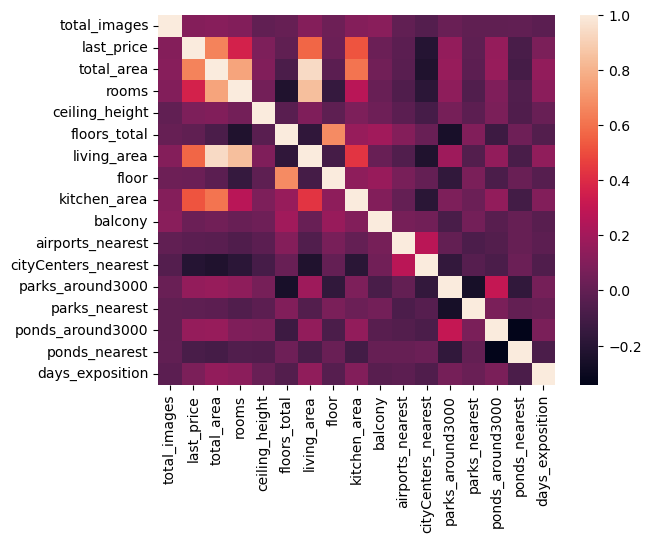

In [7]:
sns.heatmap(correlation_matrix)

Причина отсутствия значений ceiling_height может быть связана с незнанием этих данных людьми, которые заполняли анкету, или с незначимостью этого параметра для некоторых объектов, что может привести к его игнорированию при заполнении анкеты. Также из карты видим, что взаимосвязь между ceiling_height и другими значениями нет. Мы можем заполнить пустые значения медианой или средним значением всех высот объектов недвижимости.

In [8]:
df['ceiling_height'].median()

2.65

In [9]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [10]:
df.query('floors_total.isnull()') #выводим только те записи, в которых отсутствуют значения в floors_total.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Мы выводили только те записи, в которых отсутствуют значения в floors_total. И мы видим, что недвижимости расположены на разных этажах. Кроме того, из тепловой карты можно видеть, что общее количество этажей зданий в некоторой степени зависит от этажа, на котором расположен объект. Тогда мы можем группировать объекты по этажам, на которых они расположены. Затем находим для каждого среднее значение общего количества этажей в здании. Этими же значениями можем заполнить все пропущенные места в колонке floors_total.

In [11]:
data=df.groupby('floor').agg({'floors_total':'mean'}).reset_index().sort_values(by='floor', ascending=True)
data.columns = ['floor', 'average_floors_total']
data['average_floors_total']=round(data['average_floors_total']) #Т.к количество этажей может быть только целым числом, округляем его до ближайшего целого числа
data

,floor,average_floors_total
0,1,7.0
1,2,7.0
2,3,8.0
3,4,8.0
4,5,8.0
5,6,12.0
6,7,12.0
7,8,13.0
8,9,13.0
9,10,16.0


In [12]:
df = pd.merge(df, data, on='floor', how='left') #Обьединяем две таблицы, чтобы легче было заполнить пустые значения
df['floors_total'] = df['floors_total'].fillna(df['average_floors_total'])

In [13]:
del df['average_floors_total'] #Удалияем колнку average_floors_total, т.к теперь она нам не нужна

Возможной причиной пропусков данных в колонках living_area, kitchen_area, balcony может быть просто их отсутствие. Также со столбцами parks_around3000, ponds_around3000. Все эти пропущенные значения можно заполнить нулями. Пустые значения в days_exposition также могут быть заполнены нулями, поскольку с момента выставления недвижимости на продажу может не пройти больше дней.

In [14]:
df['balcony'] = df['balcony'].fillna(0)
df['living_area'] = df['living_area'].fillna(0)
df['kitchen_area'] = df['kitchen_area'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['days_exposition'] = df['days_exposition'].fillna(0)

In [15]:
df['locality_name'] = df['locality_name'].fillna('Город неизвестен') 

Значения в столбце is_apartment могут быть пропущены из-за того, что объект недвижимости не является квартирой.

In [16]:
df['is_apartment'] = df['is_apartment'].fillna('False')

### Очистите данные от областей (locality_name), в которых менее 50 объявлений

In [17]:
cities = df.groupby('locality_name').agg({'total_images':'count'}).reset_index().sort_values(by='total_images', ascending=False)
cities = cities[cities['total_images']>50]
cities = cities.drop('total_images', axis=1)
df=pd.merge(cities, df, on = 'locality_name', how = 'left')
df

,locality_name,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,Санкт-Петербург,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,False,25.0,0.0,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0
1,Санкт-Петербург,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,...,False,8.3,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
2,Санкт-Петербург,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,0.0,9,...,False,0.0,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
3,Санкт-Петербург,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,False,41.0,0.0,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
4,Санкт-Петербург,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,0.0,22,...,False,18.9,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,Луга,1,1930000.0,47.0,2018-04-06,1,2.65,9.0,0.0,6,...,False,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,45.0
21632,Луга,15,1800000.0,36.0,2016-05-18,1,2.65,5.0,28.0,4,...,False,9.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,170.0
21633,Луга,10,2900000.0,63.0,2018-07-12,3,2.50,5.0,46.0,3,...,False,5.5,1.0,NaN,NaN,0.0,NaN,0.0,NaN,70.0
21634,Луга,9,1950000.0,44.2,2019-04-08,2,2.50,5.0,0.0,3,...,False,0.0,1.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0


### Количество обьявлений по городам

In [125]:
df.groupby('locality_name').agg({'total_images':'count'}).reset_index().sort_values(by='total_images', ascending=False)

,locality_name,total_images
19,Санкт-Петербург,15721
32,посёлок Мурино,522
34,посёлок Шушары,440
1,Всеволожск,398
18,Пушкин,369
7,Колпино,338
33,посёлок Парголово,327
3,Гатчина,307
27,деревня Кудрово,299
2,Выборг,237


### Средние значения по городам

#### Средняя цена квартир по городам

In [127]:
df.groupby('locality_name').agg({'last_price':'mean'}).reset_index().sort_values(by='last_price', ascending=False)

,locality_name,last_price
19,Санкт-Петербург,8.062507e+06
18,Пушкин,6.469036e+06
21,Сестрорецк,6.341722e+06
11,Кудрово,4.573916e+06
33,посёлок Парголово,4.488075e+06
16,Петергоф,4.423841e+06
27,деревня Кудрово,4.234158e+06
10,Кронштадт,4.132365e+06
34,посёлок Шушары,4.108082e+06
7,Колпино,3.964021e+06


#### Средняя цена квартир по количеству комнат

In [128]:
df.groupby('rooms').agg({'last_price':'mean'}).reset_index().sort_values(by='last_price', ascending=False)

,rooms,last_price
12,12,4.200000e+08
14,15,6.500000e+07
7,7,5.147007e+07
8,8,5.022417e+07
9,9,3.415236e+07
16,19,3.225000e+07
6,6,3.198766e+07
15,16,2.850000e+07
13,14,2.682950e+07
10,10,2.616667e+07


#### Cредняя продолжительность продажи квартир по количеству комнат

In [129]:
df.groupby('rooms').agg({'days_exposition':'mean'}).reset_index().sort_values(by='days_exposition', ascending=False)

,rooms,days_exposition
15,16,1365.000000
11,11,406.500000
8,8,358.500000
13,14,256.500000
5,5,238.577287
9,9,231.750000
4,4,203.408688
6,6,202.466019
3,3,169.204774
2,2,151.091873


#### Медианная высота потолков, сгруппированных по городам

In [131]:
df.groupby('locality_name').agg({'ceiling_height':'median'}).reset_index().sort_values(by='ceiling_height', ascending=False)

,locality_name,ceiling_height
0,Волхов,2.650
1,Всеволожск,2.650
33,посёлок Парголово,2.650
32,посёлок Мурино,2.650
30,посёлок Бугры,2.650
29,деревня Старая,2.650
28,деревня Новое Девяткино,2.650
27,деревня Кудрово,2.650
26,городской посёлок Янино-1,2.650
25,Шлиссельбург,2.650


### 1.  Посчитайте цену за квадратный метр (Подойдите к этому вопросу логически)

In [18]:
df['price_per_square_meter']=df['last_price']/df['total_area'] 
df['price_per_square_meter']

0        120370.370370
1         92785.714286
2        408176.100629
3        100000.000000
4        110544.692737
             ...      
21631     41063.829787
21632     50000.000000
21633     46031.746032
21634     44117.647059
21635     17741.935484
Name: price_per_square_meter, Length: 21636, dtype: float64

### 2.  Выделите только данные из города Санкт-Петербург

In [19]:
sp_data = df.query("locality_name == 'Санкт-Петербург'")

### 3.  Постройте гистограммы и ответьте на вопросы:
- Сколько примерно дней занимает продажа объявлений в Санкт-Петербурге?
- Сколько обычно комнат в квартирах Санкт-Петербурга (Часто встречающиеся значения)
- Распределение высоты потолков в Санкт-Петербурге

#### Сколько примерно дней занимает продажа объявлений в Санкт-Петербурге?

<Axes: >

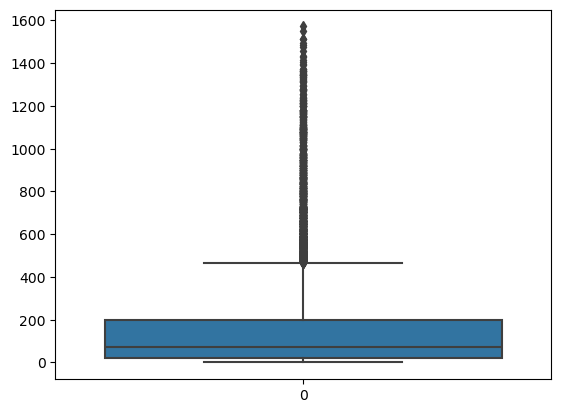

In [20]:
sns.boxplot(sp_data['days_exposition'])

In [21]:
average_days_exposition_sp = sp_data['days_exposition'].mean()
average_days_exposition_sp

158.57260988486738

Через метод boxplot мы видим, что присутствует значительное количество выбросов, которые могут существенно исказить среднее значение. Чтобы получить более репрезентативную оценку среднего значения, исключаем выбросы.

In [22]:
filtered_data = sp_data.query("days_exposition > 0 and days_exposition < 280")

<Axes: xlabel='days_exposition'>

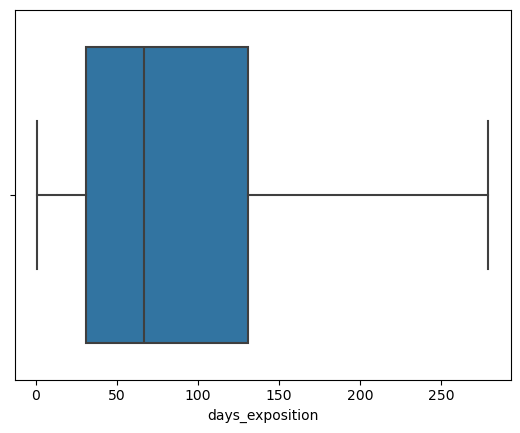

In [23]:
sns.boxplot(data=filtered_data, x='days_exposition')

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


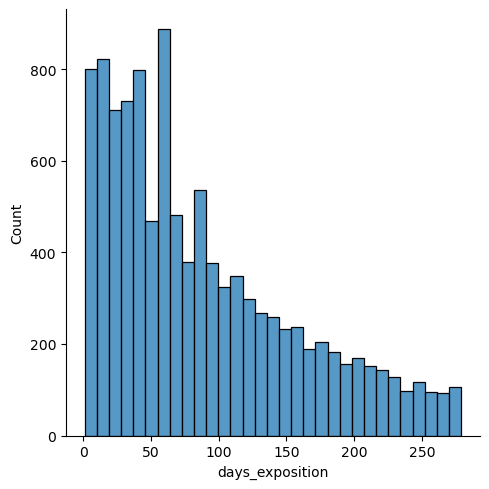

In [24]:
sns.displot(filtered_data['days_exposition'])

Согласно полученному боксплоту и графику распределения, видно, что среднее может отличаться от ранее полученного значения 158.57. Чтобы корректно удалить выбросы, применим следующие вычисления.


In [88]:
Q1 = sp_data['days_exposition'].quantile(0.25)
Q3 = sp_data['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
sp_data.query('days_exposition >= @lower_bound and days_exposition <= @upper_bound')['days_exposition'].mean()

103.53828985911564

После исключения выбросов, среднее значение становится более репрезентативным. Также, анализируя распределение данных, видим, что ранее полученное среднее значение, равное 158.57 дней не совсем точно отражает результат. Теперь, можем сказать, что продажа объявлений в Санкт-Петербурге занимает примерно 103 дней. 

#### Сколько обычно комнат в квартирах Санкт-Петербурга (Часто встречающиеся значения)

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


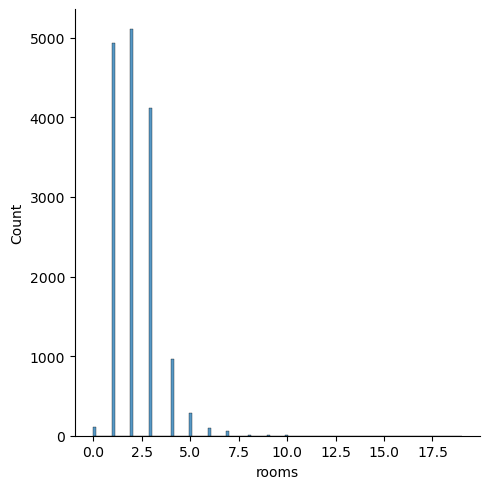

In [26]:
sns.displot(sp_data['rooms'])

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


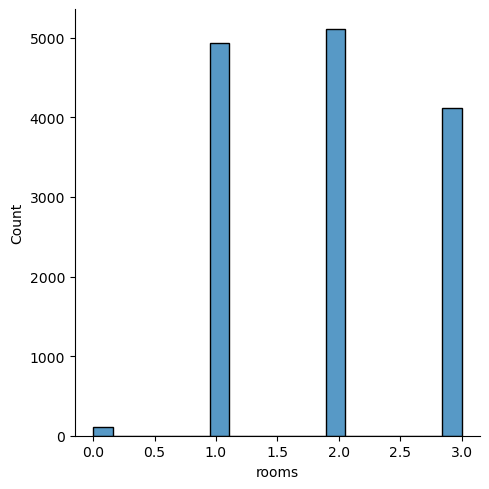

In [27]:
sns.displot(sp_data.query('rooms>=0 and rooms<4')['rooms']) #сужаем диапазон, чтобы выделить часто встречающиеся значения

Вывод: Обычно квартиры в Санкт-Петербурге имеют количество комнат от 1 до 3.

#### Распределение высоты потолков в Санкт-Петербурге

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


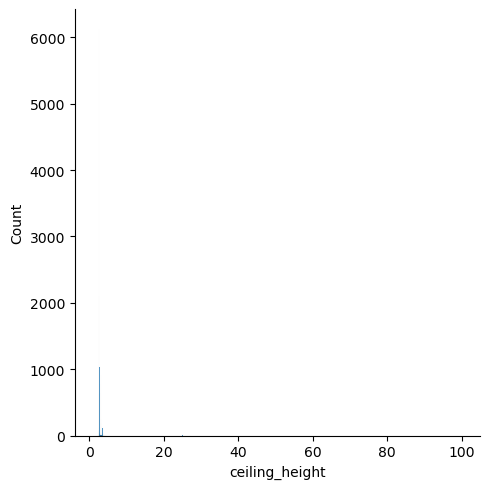

In [28]:
sns.displot(sp_data['ceiling_height'])

Возможно граф выглядит так из-за наличия разных выбросов.

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


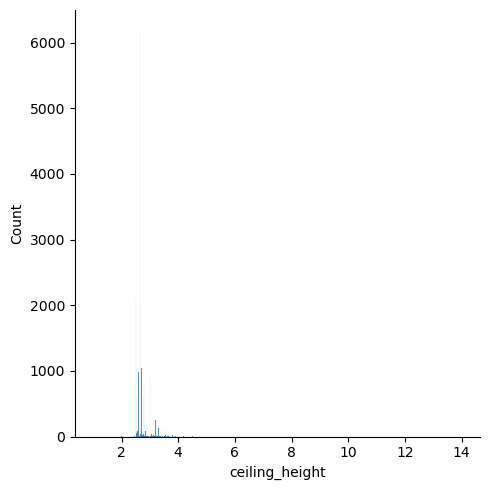

In [41]:
sns.displot(sp_data.query('ceiling_height>0 and ceiling_height<20') ['ceiling_height']) #сужаем диапазон, чтобы выделить часто встречающиеся значения

Отсюда видно, что значения в основном находятся в диапазоне 2-6. 

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


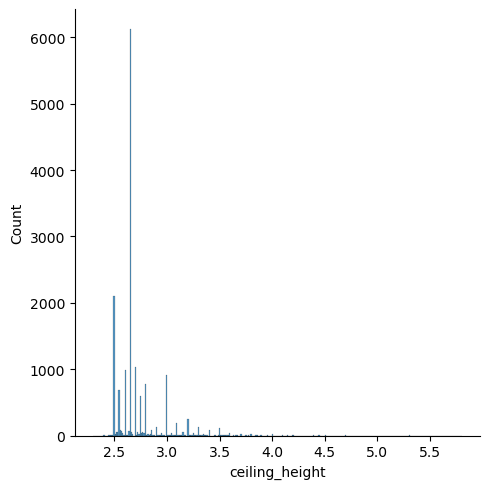

In [123]:
sns.displot(sp_data.query('ceiling_height>2 and ceiling_height<6') ['ceiling_height'])

Видим, что в основном, высоты потолков имеют значения в диапазоне 2.5 -3 метров.

### 4.  Теперь постройте такие же гистограммы по второму по дороговизне городу

#### Находим город, который второй по дороговизне

In [30]:
df.groupby('locality_name').agg({'last_price':'mean'}).reset_index().sort_values(by='last_price', ascending=False)

,locality_name,last_price
19,Санкт-Петербург,8.062507e+06
18,Пушкин,6.469036e+06
21,Сестрорецк,6.341722e+06
11,Кудрово,4.573916e+06
33,посёлок Парголово,4.488075e+06
16,Петергоф,4.423841e+06
27,деревня Кудрово,4.234158e+06
10,Кронштадт,4.132365e+06
34,посёлок Шушары,4.108082e+06
7,Колпино,3.964021e+06


Населенный пункт под названием Пушкин является вторым по дороговизне. Теперь делаем те же шаги, как в 3, с городом Пушкин. 

#### Сколько примерно дней занимает продажа объявлений в Пушкине?

In [31]:
pushkin = df.query("locality_name == 'Пушкин'")

<Axes: xlabel='days_exposition'>

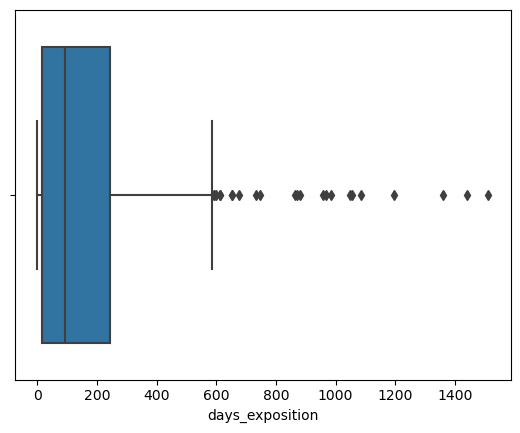

In [32]:
sns.boxplot(data = pushkin, x='days_exposition')

In [43]:
pushkin['days_exposition'].mean() # среднее, вычисленное с учетом всех выбросов

174.3658536585366

<Axes: xlabel='days_exposition'>

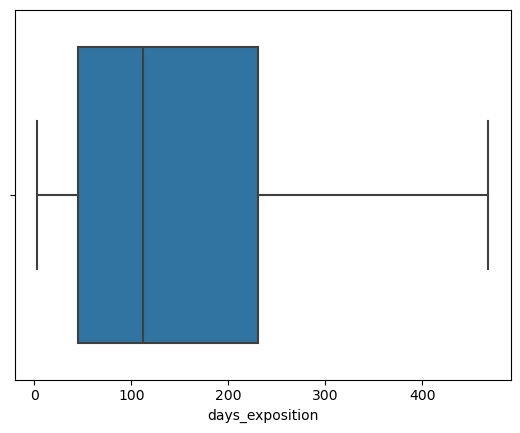

In [44]:
sns.boxplot(data = pushkin.query('days_exposition>0 and days_exposition<480'), x='days_exposition')

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


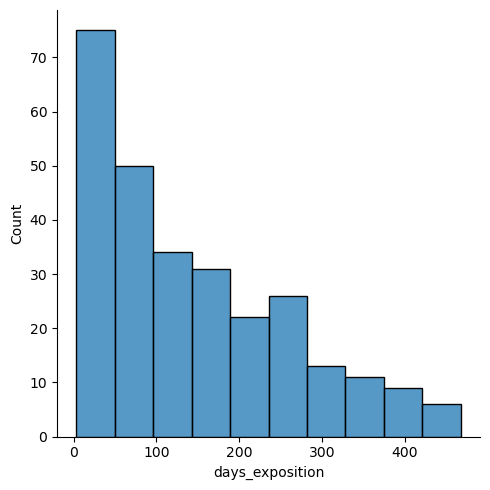

In [50]:
sns.displot(pushkin.query('days_exposition>0 and days_exposition<480')['days_exposition'])

In [89]:
Q1 = pushkin['days_exposition'].quantile(0.25)
Q3 = pushkin['days_exposition'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
pushkin.query('days_exposition >= @lower_bound and days_exposition <= @upper_bound')['days_exposition'].mean()

126.16184971098266

Продажа объявлений в городе Пушкин занимает примерно 126 дней. 

#### Сколько обычно комнат в квартирах Пушкина (Часто встречающиеся значения)

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


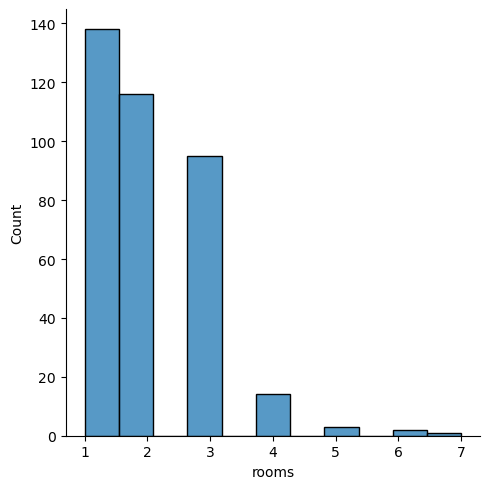

In [37]:
sns.displot(pushkin['rooms'])

Также как в Санкт-Перербурге, количество комнат недвижимостей в городе Пушкин имеют количество комнат в диапазоне 1-3.

#### Распределение высоты потолков в городе Пушкин

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


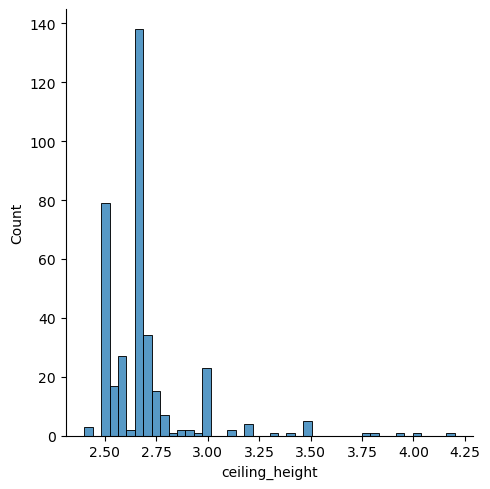

In [38]:
sns.displot(pushkin['ceiling_height'])

Большинство квартир имеют высоту потолков в пределах от 2.5 до 3 метров.

### 5.  Что вы можете сказать по данным из Санкт Петербурга и выбранному городу?

В обоих городах высота потолков и количество комнат в недвижимости практически одинаковы. Но в городе Пушкин продажа недвижимостей занимает больше дней, чем в Санкт-Петербурге. Даже если недвижимость в Санкт-Петербурге стоит дороже, чем в Пушкине, спрос на жилье в первом городе, вероятно, выше. Возможные причины могут быть связаны с тем, что экономическая ситуация в Санкт-Петербурге более стабильна, расположение города удобное, инфраструктура развита, а также с другими факторами.

### 6.  В каком из двух городов квартиры продаются быстрее и в каком из всех городов идет наименьшая средняя продолжительность продажи квартиры?

Судя по вычисленным средним, квартиры в Санкт-Петербурге, вероятно, продаются быстрее, чем в городе Пушкин, как упоминалось в предыдущем пункте.

In [90]:
df.groupby('locality_name').agg({'days_exposition':'mean'}).reset_index().sort_values(by = 'days_exposition', ascending=False) # средние, вычисленные с учетом всех выбросов

,locality_name,days_exposition
8,Коммунар,205.617978
14,Никольское,195.354839
12,Ломоносов,188.067669
21,Сестрорецк,186.437158
17,Приозерск,182.151515
27,деревня Кудрово,180.872910
16,Петергоф,179.208955
18,Пушкин,174.365854
9,Красное Село,170.955056
1,Всеволожск,167.869347


Чтобы найти среднее значение продолжительности продажи квартир во всех городах, применим те же вычисления, которые использовали для двух городов ранее. Так как городов очень много, лучше будет создать функцию, которая выполнит эти вычисления для каждого из них.

In [91]:
def remove_outliers_and_calculate_mean(group):
    Q1 = group['days_exposition'].quantile(0.25)
    Q3 = group['days_exposition'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_group = group.query('days_exposition >= @lower_bound and days_exposition <= @upper_bound')
    mean_days_exposition = filtered_group['days_exposition'].mean()
    return pd.Series({'mean_days_exposition': mean_days_exposition})

# Применение функции к каждой группе городов
result = df.groupby('locality_name').apply(remove_outliers_and_calculate_mean).reset_index()

result.reset_index().sort_values(by='mean_days_exposition', ascending=False)


,index,locality_name,mean_days_exposition
14,14,Никольское,163.685393
17,17,Приозерск,161.609375
21,21,Сестрорецк,153.171429
9,9,Красное Село,142.194118
12,12,Ломоносов,138.048780
29,29,деревня Старая,126.868852
18,18,Пушкин,126.161850
6,6,Кировск,124.974684
8,8,Коммунар,123.300000
1,1,Всеволожск,120.766304


Согласно полученным данным, наименьшая средняя продолжительность продажи квартир наблюдается в городе Кириши. Если не удалять выбросы и вычислять средние значения с учетом всех выбросов, то в городе Кириши средняя продолжительность продажи квартиры будет второй наименьшей. Однако, мы примем во внимание первый вариант, где все выбросы были удалены для вычисления среднего, так как выбросы искажают среднее значение. Таким образом, из всех городов в таблице квартиры быстрее всего продаются в городе Кириши.

### 7. Создайте отдельный столбец, где будет разметка того, находится ли недвижимость на последнем этаже или нет.

In [96]:
df['is_top_floor'] = df['floors_total'] == df['floor'] 

In [100]:
df['is_top_floor'].unique() #Новый столбец, который указывает, находится ли недвижимость на последнем этаже или нет, содержит только два значения.

array([False,  True])

In [101]:
df

,locality_name,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,is_top_floor
0,Санкт-Петербург,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,...,0.0,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,120370.370370,False
1,Санкт-Петербург,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,...,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,False
2,Санкт-Петербург,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,0.0,9,...,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.100629,False
3,Санкт-Петербург,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,...,0.0,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.000000,False
4,Санкт-Петербург,5,7915000.0,71.6,2019-04-18,2,2.65,24.0,0.0,22,...,2.0,23982.0,11634.0,0.0,NaN,0.0,NaN,0.0,110544.692737,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21631,Луга,1,1930000.0,47.0,2018-04-06,1,2.65,9.0,0.0,6,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,45.0,41063.829787,False
21632,Луга,15,1800000.0,36.0,2016-05-18,1,2.65,5.0,28.0,4,...,0.0,NaN,NaN,0.0,NaN,0.0,NaN,170.0,50000.000000,False
21633,Луга,10,2900000.0,63.0,2018-07-12,3,2.50,5.0,46.0,3,...,1.0,NaN,NaN,0.0,NaN,0.0,NaN,70.0,46031.746032,False
21634,Луга,9,1950000.0,44.2,2019-04-08,2,2.50,5.0,0.0,3,...,1.0,NaN,NaN,0.0,NaN,0.0,NaN,0.0,44117.647059,False


### 8.  Посмотрите количество комнат по квартирам расположенным на последнем этаже

In [107]:
df.groupby('is_top_floor').agg({'rooms': 'count'}).reset_index() #Количество квартир, расположенных на последнем этаже, составляет 2853.

,is_top_floor,rooms
0,False,18783
1,True,2853


C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


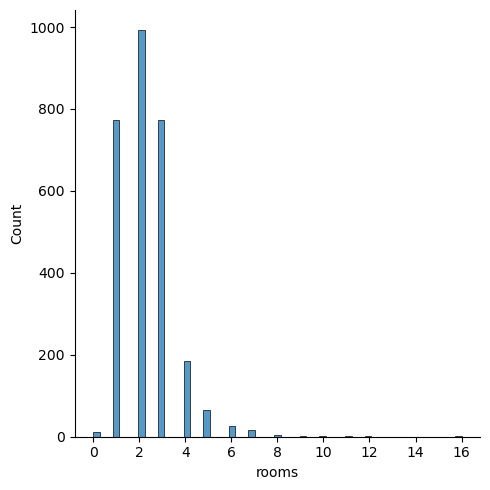

In [106]:
sns.displot(df.query('is_top_floor==True')['rooms'])

In [116]:
top_floor_rooms = df[df['is_top_floor']]['rooms']
room_counts = top_floor_rooms.value_counts().sort_index()
room_counts

rooms
0      11
1     774
2     992
3     772
4     185
5      66
6      25
7      17
8       4
9       2
10      2
11      1
12      1
16      1
Name: count, dtype: int64

C:\Users\Acer\anaconda3_\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


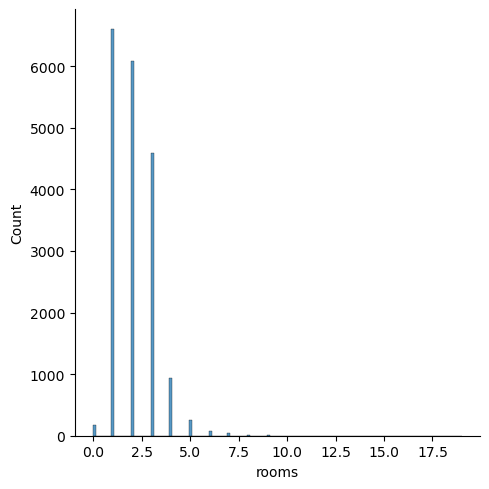

In [108]:
sns.displot(df.query('is_top_floor==False')['rooms'])

In [117]:
not_top_floor_rooms = df[~df['is_top_floor']]['rooms']
not_top_floor_room_counts = not_top_floor_rooms.value_counts().sort_index()
not_top_floor_room_counts

rooms
0      176
1     6600
2     6083
3     4590
4      943
5      251
6       78
7       42
8        8
9        6
10       1
11       1
14       2
15       1
19       1
Name: count, dtype: int64

### 9.  Посчитайте среднюю цену квартир расположенных на последнем этаже

In [111]:
df.query('is_top_floor==True')['last_price'].mean()

8178269.531370487

In [113]:
df.query('is_top_floor==False')['last_price'].mean()

6715928.823617101

In [112]:
df.query('is_top_floor==True')['last_price']

13        2950000.0
23        3790000.0
26        9330000.0
33       11795000.0
38        6300000.0
            ...    
21610     2400000.0
21619     1100000.0
21623     1650000.0
21625     1650000.0
21635     1100000.0
Name: last_price, Length: 2853, dtype: float64

In [121]:
df.query('is_top_floor==True').groupby('locality_name').agg({'rooms':'count'}).reset_index().sort_values(by='rooms', ascending=False)

,locality_name,rooms
19,Санкт-Петербург,1904
18,Пушкин,85
1,Всеволожск,72
3,Гатчина,65
7,Колпино,56
34,посёлок Шушары,54
2,Выборг,53
16,Петергоф,43
9,Красное Село,43
22,Сланцы,35


### 10.  Что вы можете сказать в результате проделанной работы?

Количество квартир, расположенных на последнем этаже, составляет 2853. Количество комнат в квартирах, расположенных на последнем этаже и не на последнем, практически не отличается. В обеих группах больше всего двухкомнатных квартир, также много однокомнатных и трехкомнатных. Однако, несмотря на это, средняя цена квартир на последнем этаже значительно выше, чем у остальных квартир.

### 11. Теперь сформулируйте предложение, в каком городе лучше всего будет брать квартиру, помимо Санкт Петербурга, для дальнейшей перепродажи и сколько комнат лучше брать, чтобы произвести продажу быстрее?

In [173]:
df.query("locality_name=='Пушкин'")['rooms'].quantile(0.945)

3.0

После проведённого анализа мы сравнили Санкт-Петербург с другими городами, учитывая факторы, влияющие на продажи недвижимости. Большинство потенциальных покупателей заинтересованы именно в покупке недвижимости в Санкт-Петербурге, поэтому мы выделили ключевые аспекты для дальнейшего сравнения с другими городами и определения наиболее перспективного места для инвестиций в недвижимость. 
Анализ Санкт-Петербурга показал, что большинство квартир имеют от 1 до 3 комнат, а медианная высота потолков составляет 2.5 метра. Одним из возможных факторов, влияющих на высокий спрос в этом городе, является значительное количество объявлений о продаже квартир – 15721, что в 30-40 раз превышает количество объявлений в других городах. Ещё одним показателем высокого спроса может быть высокий уровень цен на квартиры

Для определения наиболее перспективного города для инвестиций в недвижимость помимо Санкт-Петербурга, мы будем учитывать среднюю стоимость квартир и количество объявлений по городам. Это поможет выявить, где именно есть высокий спрос на недвижимость и где можно получить прибыль от перепродажи. Пушкин оказался вторым по дороговизне городом, с высоким уровнем цен на квартиры и значительным количеством объявле Из предоставленных данных видно, что квартиры с 1-2-3 комнатами составляют 94.5% всех квартир в городе Пушкин. Однако, скорость продажи квартир с 15, 10, 0, 12, 19 и 7 комнатами, хоть и впечатляющая, не может быть надёжным индикатором, учитывая их небольшую долю на рынке недвижимости. 
Наиболее значимыми для перепродажи остаются квартиры с 1-2-3 комнатами, так как они не только составляют основную массу предложения на рынке, но и обладают стабильным спросом, что отражается в их быстрой продаже. Таким образом, для эффективной стратегии перепродажи наиболее разумным выбором будут именно квартиры с указанным количеством комнат.ний.